# CSC360: Midterm


CSC360: Machine Learning and Pattern Recognition
Instructor: Ellie Sherafat (sherafate@easternct.edu)

---

**Due**: Oct 20, 11:59 PM


**How to submit**: Create a zip folder named "Midterm_your name". Include the `.ipynb` file with your answers plus its `.html` file as a backup. 


**Your questions**: 

1- If you have a question for me, post it under the "Questions for the Professor" forum. Any post is visible to your classmates, and they may benefit as well. 

2- Collaboration for the midterm is allowed in two ways: 
- You can ask your question in the "Q&A forum, midterm thread".  
- Everyone has assigned to a study group of three or four members in Blackboard. You can reach out to them, join a room to meet, and post in your study group's forum. Here is a link about groups in Blackboard If you have not used that before: https://help.blackboard.com/Learn/Student/Interact/Groups


**Important**:
- The places that require your code answer are marked with `"# YOUR CODE"` comments.
- Please do not procrastinate! Reach out to your study group member and start working on the questions as soon as you can.

Good Luck!

---

## Name:[Enter your name here]

---

## 1) [10 pts]
A rectified linear activation function or `ReLU` for short,is a simple fuction in deep learning that returns the value provided as input directly, or the value 0.0 if the input is 0.0 or less. Implement the ReLU function in Python.

$$
ReLU(x) =
    \begin{cases}
            x, &         \text{if } x>0\\
            0, &         \text{if } x<=0
    \end{cases}
$$


In [6]:
def rectified(x):
    # YOUR CODE
    return x if x > 0 else 0
    # or retrun max(x,0)

## 2) [10 pts]
Suppose `y_true` and `y_pred` are lists of true class labels and predicted class labels by a classifier respectively. Calculate accuracy **in percent without** using any external libraries like NumPy or scikit-learn.

In [8]:
y_true = [1, 2, 0, 4, 1, 2, 3, 1, 2, 1]
y_pred = [1, 2, 1, 4, 1, 0, 3, 1, 2, 1]


correct = 0
total_elements = len(y_true)
for i, j in zip(y_true, y_pred):
    # YOUR CODE 
    correct += 1 if i==j else 0
        
accuracy = 100*correct/total_elements    # YOUR CODE
        
print('Accuracy: %.2f%%' % (accuracy))

Accuracy: 80.00%


## 3) [10 pts]

Create a 2x2 NumPy array with random values drawn from a uniform distribution using the random seed `42` and show the results below.

In [39]:
import numpy as np

rng = np.random.RandomState(42)
# YOUR CODE
arr = rng.rand(2,2)
print(arr)

[[0.37454012 0.95071431]
 [0.73199394 0.59865848]]


## 4) [10 pts]

Use the NumPy slicing syntax to select the 2x2 upper-right corner of `A` matrix.

```python
array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9]])
```



In [7]:
A = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]])

# YOUR CODE
subset = A[:2,1:]
print(subset)

[[2 3]
 [5 6]]


## 5) [10 pts]
Given the array `A` below, find the most frequent integer in that array.


In [4]:
import numpy as np
import numpy as np
rng = np.random.RandomState(42)
A = rng.randint(0, 20, 100)
# YOUR CODE
print(repr(A))
print(repr(np.bincount(A)))
print('Most frequent: ',np.bincount(A).argmax())


array([ 6, 19, 14, 10,  7,  6, 18, 10, 10,  3,  7,  2,  1, 11,  5,  1,  0,
       11, 11, 16,  9, 15, 14, 14, 18, 11, 19,  2,  4, 18,  6,  8,  6, 17,
        3, 13, 17,  8,  1, 19, 14,  6, 11,  7, 14,  2, 13, 16,  3, 17,  7,
        3,  1,  5,  9,  3, 17, 11,  1,  9,  3, 13, 15, 14,  7, 13,  7, 15,
       12, 17, 14, 12,  8, 14, 12,  0,  6,  8,  0, 11,  7, 10, 18, 16,  7,
        2,  2,  0,  4,  9,  6,  8,  6,  8,  7, 11,  1,  0, 15,  4])
array([5, 6, 5, 6, 3, 2, 8, 9, 6, 4, 4, 8, 3, 4, 8, 4, 3, 5, 4, 3],
      dtype=int64)
Most frequent:  7


## 6) [80+20 bonus pts]

Complete the lines of the codes below to answer the following questions: 



(a) How many datapoints are there? [Your answer] **165 datapoints**

(b) How many features does each datapoint have? [Your answer] **Two numerical features, one class label**

(c) Do the features have the same units? (Y/N) [Your answer] **Removed**

(d) Do the features have similar numerical range? (Y/N) [Your answer] **No**

(e) What percentage of the training data are in class 1? [Your answer] **90.91%**

(f) Using KNN classification, what was the model accuracy? [Your answer] **96.97%**

(g) Do you think this is a good accuracy? Why? [Your answer] **Consider a naive classifier that always predict a datapoint belongs to class 1. Then, the accuracy would be ~90%. The KNN accuracy (97%) looks good compare to the naive classifer accuracy. However, in general accuracy is not a good performance metric for an imbalanced data.** 

(h) Change the randomseed at making the split step and re-run the code. Do you get a different accuracy? [Your answer] **Yes, changing the randomseed changed the accuracy. We always need to set randomseed for the result reproducibilty.**

(i) Visualize the decision boundary of the model (20 bonus points)


Total number of datapoints, number of features: 
165 2
                0           1
count  165.000000  165.000000
mean     1.224772    0.498209
std      1.324243    1.008767
min     -3.224918   -1.913280
25%      0.653206   -0.207669
50%      1.465288    0.542560
75%      2.021942    1.156554
max      3.814659    4.352731
Percent of training data is in class 1:  90.91
Test accuracy: 96.97


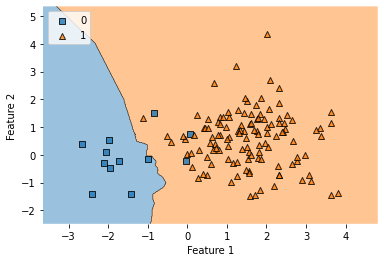

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import datasets
import pandas as pd

# Generate toy imbalanced dataset from sklearn
Xdat,ydat = datasets.make_blobs(n_samples=[15, 150], centers=[[-1.5,0],[1.5,0.5]], cluster_std=[1,1], n_features=2, random_state=42)
print('Total number of datapoints, number of features: ')

# YOUR CODE for (a), (b), (c), and (d)
print(Xdat.shape[0], Xdat.shape[1])   # (a),(b)
print(pd.DataFrame(Xdat).describe())  # (d)



# Make a 80%-20% train/test split
randomseed = 42
X_train, X_test, y_train, y_test = train_test_split(Xdat,ydat,test_size=0.2,random_state=randomseed)

# YOUR CODE for (e)
print('Percent of training data is in class 1: ', round(100 * y_train[y_train == 1].sum() /len(y_train) ,2))

# Train logistic regression model (with default regularization) for binary classification
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Make predictions on test data and print the test accuracy
y_pred = model.predict(X_test)
test_accuracy = metrics.accuracy_score(y_test, y_pred)
print('Test accuracy: '+str(round(100*test_accuracy,2)))

# Bonus
from mlxtend.plotting import plot_decision_regions


plot_decision_regions(X_train, y_train, model)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper left')
plt.show()


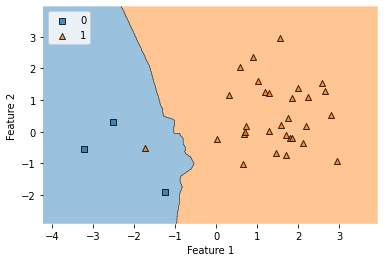

In [34]:
plot_decision_regions(X_test, y_test, model)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper left')
plt.show()

## 7) [20 pts]

Run the following code and answer the following questions:

(a) How do accuracy change with changing the tree maximum depth? [Your answer] **You were supposed to change the depth variable and report the effect. However, you can use a validation curve which to look at this effect. You will see an example in your homework 1**

(b) What are the ways to reduce overfitting in a decision tree? [Your answer] **Reduce the maximum depth of the tree, increase the minimum samples split, increase the number of samples, and decrease the number of features.**

Test accuracy of decision tree classifier on Iris dataset: 0.9777777777777777


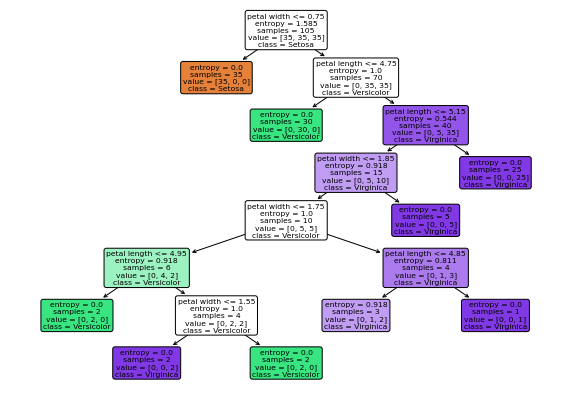

In [24]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier


iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=10, 
                              random_state=1)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
test_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Test accuracy of decision tree classifier on Iris dataset: "+str(test_accuracy))

plt.figure(figsize=(10, 7))

plot_tree(tree, 
          filled=True, 
          rounded=True,
          class_names=['Setosa', 
                       'Versicolor',
                       'Virginica'],
          feature_names=['petal length', 
                         'petal width']) 

plt.show()